In [1]:
import os
os.system('rm -rf kcnischool2022-projectweek')
os.system('git clone https://github.com/griffithslab/kcnischool2022-projectweek')
os.chdir('kcnischool2022-projectweek/data')
os.system('python download_ds000201_data.py')
os.chdir('../')
os.system('pip install nilearn hcp_utils')

0

In [2]:
import os,sys,glob,numpy as np,pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import nibabel as nib

import hcp_utils as hcp
from nilearn.plotting import plot_connectome


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
from kspw.utils import load_stockholm_data
stuff = load_stockholm_data()


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [4]:
%%capture
!pip install nilearn
!pip install hcp_utils
# @title Install Dependencies

In [5]:
import pandas as pd
import numpy as np
import glob
import os,sys
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import nibabel as nib
import hcp_utils as hcp
import scipy
from nilearn.connectome import sym_matrix_to_vec
# @title Importage

In [6]:
data_dir = '/content/kcnischool2022-projectweek/data/'

subj_info = data_dir + '/subjinfo/participants.tsv'
subj_info = pd.read_csv(subj_info,sep='\t',index_col=0)
subj_info.head()

,Sex,AgeGroup,BMI1,BMI2,EducationLevel,HADS_Anxiety,HADS_Depression,ISI,KSQ_SleepQualityIndex,KSQ_WakeupSymptomIndex,...,PPIR_IR15,PPIR_IR40,BADD_Total,BADD_Activation,BADD_Attention,BADD_Effort,BADD_Affect,BADD_Memory,Sl_cond,Trial
participant_id,,,,,,,,,,,,,,,,,,,,,
sub-9001,Male,Young,"19,78997095","19,78997095",Studerar för närvarande på universitet/högskola,0,1,12,"4,75","4,666666667",...,11.0,29.0,16.0,6.0,2.0,2.0,6.0,0.0,2,B
sub-9002,Male,Old,"21,79944511","21,46915048",Har avslutat gymnasieskolan,2,3,9,"5,5","5,666666667",...,10.0,32.0,33.0,5.0,8.0,6.0,8.0,6.0,2,B
sub-9003,Male,Old,"20,49861496","20,49861496",Har examen från universitet/högskola,2,3,10,"5,25","5,666666667",...,12.0,26.0,13.0,4.0,4.0,4.0,1.0,0.0,1,B
sub-9004,Female,Old,"22,94811574","22,94811574",Har examen från universitet/högskola,1,2,11,"4,25","5,666666667",...,10.0,28.0,24.0,3.0,7.0,5.0,6.0,3.0,1,B
sub-9005,Male,Old,"24,75546432","24,75546432",Har avslutat gymnasieskolan,0,0,9,6,"5,666666667",...,8.0,28.0,30.0,9.0,5.0,7.0,3.0,6.0,2,B


In [7]:
dwi_files = sorted(glob.glob(data_dir + '/dwiconn/*.csv'))
subj2use = []

for xx in range(len(dwi_files)):
  subj2use.append('sub' + dwi_files[xx].split('sub')[1][:5])

subj_info_filtered = subj_info.loc[subj2use]
subj_info_filtered.head()

,Sex,AgeGroup,BMI1,BMI2,EducationLevel,HADS_Anxiety,HADS_Depression,ISI,KSQ_SleepQualityIndex,KSQ_WakeupSymptomIndex,...,PPIR_IR15,PPIR_IR40,BADD_Total,BADD_Activation,BADD_Attention,BADD_Effort,BADD_Affect,BADD_Memory,Sl_cond,Trial
participant_id,,,,,,,,,,,,,,,,,,,,,
sub-9002,Male,Old,"21,79944511","21,46915048",Har avslutat gymnasieskolan,2,3,9,"5,5","5,666666667",...,10.0,32.0,33.0,5.0,8.0,6.0,8.0,6.0,2,B
sub-9003,Male,Old,"20,49861496","20,49861496",Har examen från universitet/högskola,2,3,10,"5,25","5,666666667",...,12.0,26.0,13.0,4.0,4.0,4.0,1.0,0.0,1,B
sub-9004,Female,Old,"22,94811574","22,94811574",Har examen från universitet/högskola,1,2,11,"4,25","5,666666667",...,10.0,28.0,24.0,3.0,7.0,5.0,6.0,3.0,1,B
sub-9005,Male,Old,"24,75546432","24,75546432",Har avslutat gymnasieskolan,0,0,9,6,"5,666666667",...,8.0,28.0,30.0,9.0,5.0,7.0,3.0,6.0,2,B
sub-9008,Male,Old,"22,34029707","22,64219297",Har avslutat gymnasieskolan,1,1,9,5,4,...,13.0,28.0,17.0,4.0,5.0,3.0,1.0,4.0,2,A


In [8]:
url = 'https://raw.githubusercontent.com/ThomasYeoLab/CBIG/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/'
atlas2use = 'Parcellations/MNI/Centroid_coordinates/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv'

atlas  = pd.read_csv(url + atlas2use)
atlas

,ROI Label,ROI Name,R,A,S
0,1,7Networks_LH_Vis_1,-26,-34,-18
1,2,7Networks_LH_Vis_2,-26,-76,-14
2,3,7Networks_LH_Vis_3,-18,-60,-6
3,4,7Networks_LH_Vis_4,-26,-96,-4
4,5,7Networks_LH_Vis_5,-6,-92,-2
...,...,...,...,...,...
95,96,7Networks_RH_Default_PFCdPFCm_1,6,48,0
96,97,7Networks_RH_Default_PFCdPFCm_2,12,50,40
97,98,7Networks_RH_Default_PFCdPFCm_3,26,24,50
98,99,7Networks_RH_Default_pCunPCC_1,12,-54,14


In [9]:
coordinates = {'R': atlas['R'], 'A': atlas['A'], 'S': atlas['S']}
coordinates = pd.DataFrame(coordinates)
coordinates.head()

,R,A,S
0,-26,-34,-18
1,-26,-76,-14
2,-18,-60,-6
3,-26,-96,-4
4,-6,-92,-2


In [10]:
pts_dir = data_dir + '/ptseries/'
ses2use = 'ses-1'


all_ptsrs_fs = []

for xx in subj2use:
  all_ptsrs_fs.append(pts_dir + xx + '_' + ses2use + '_task-rest_atlas-SchaeferP100N7_desc-cleaneds0_bold.ptseries.nii')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


[]

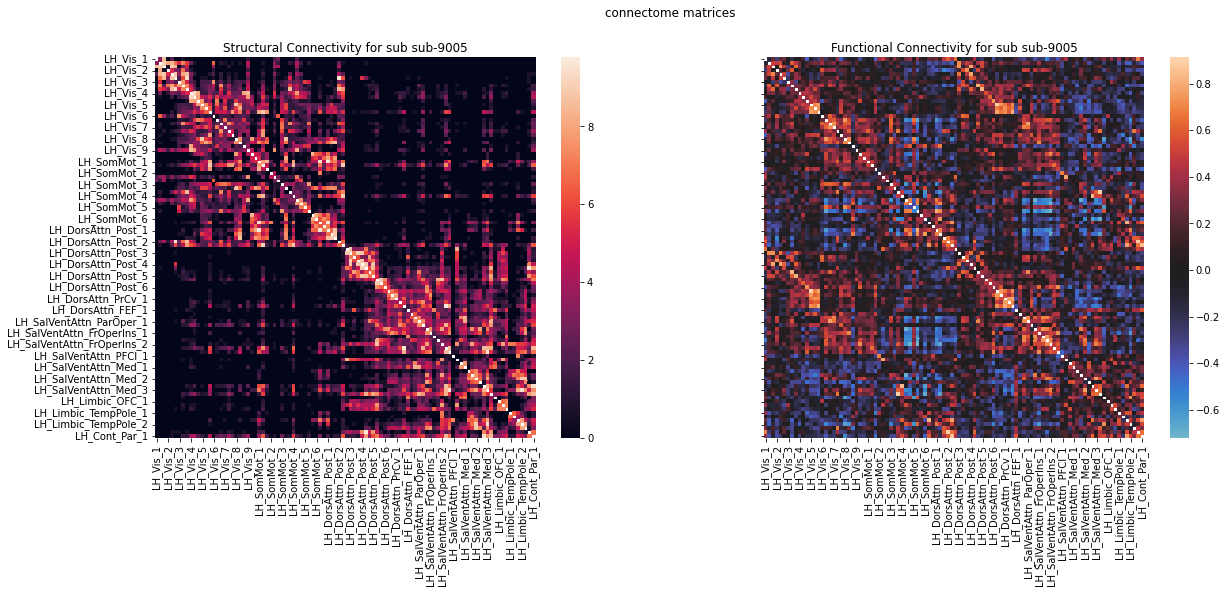

In [11]:
# @title #Plot SC and FC

# Select Subject
sub = "sub-9005"  # @param ['sub-9002','sub-9003','sub-9004','sub-9005','sub-9008','sub-9009','sub-9011','sub-9014','sub-9018','sub-9020','sub-9023','sub-9025','sub-9026','sub-9028','sub-9029','sub-9032','sub-9033','sub-9034','sub-9036','sub-9038','sub-9039','sub-9040','sub-9041','sub-9042','sub-9045','sub-9046','sub-9047','sub-9048','sub-9049', 'sub-9055','sub-9058','sub-9061','sub-9062','sub-9064','sub-9065','sub-9068','sub-9069','sub-9071','sub-9072','sub-9075', 'sub-9079','sub-9080','sub-9081','sub-9084','sub-9085','sub-9086','sub-9087','sub-9088','sub-9089','sub-9092','sub-9093','sub-9094','sub-9096','sub-9098']

subj_idx = [i for i, s in enumerate(all_ptsrs_fs) if sub in s][0]

ts2use = nib.load(all_ptsrs_fs[subj_idx]).get_data()
fc_matrix = np.array(pd.DataFrame(ts2use).corr())
sc_matrix = np.array(pd.read_csv(data_dir + '/dwiconn/' + sub + '_Schaefer2018_100Parcels_7Networks.csv', sep = ' ' , header=None))
sc_matrix = sc_matrix -2*np.diag(np.diag(sc_matrix)) + sc_matrix.T 
sc_matrix =  np.log1p(sc_matrix)

label_stripped = []
for xx in range(len(atlas['ROI Name'])):
    label_stripped.append(atlas['ROI Name'][xx].replace('7Networks_',''))


#sns.heatmap(fc_matrix,center=0,mask=np.eye(100),)


fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
fig.suptitle('connectome matrices')

# SC
sns.heatmap(sc_matrix,mask=np.eye(100), ax=axes.flat[0], square=True)
axes.flat[0].set_title('Structural Connectivity for sub ' + sub)
axes.flat[0].set_xticklabels(label_stripped, rotation=90)
axes.flat[0].set_yticklabels(label_stripped, rotation=0)

# FC (normalized between 0 and 3)
sns.heatmap(fc_matrix, center=0,mask=np.eye(100), ax=axes.flat[1], square=True)
axes.flat[1].set_title('Functional Connectivity for sub ' + sub)
axes.flat[1].set_xticklabels(label_stripped, rotation=90)
axes.flat[1].set_yticklabels(label_stripped, rotation=0)

Text(0.5, 1.0, 'r = 0.30852615502737674')

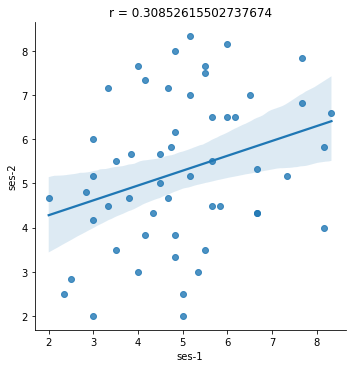

In [12]:
subj2use.remove("sub-9100")

KSS_mean_ses1 = []
KSS_mean_ses2 = []

for sub in subj2use:
  f = data_dir + '/subjinfo/%s_sessions.tsv' %sub
  _df = pd.read_csv(f,sep='\t',index_col=0).T
  KSS_mean_ses1.append(np.mean(_df['ses-1'][1:7][:]))
  KSS_mean_ses2.append(np.mean(_df['ses-2'][1:7][:]))

KSS_mean_ses1 = np.array(KSS_mean_ses1)
KSS_mean_ses2 = np.array(KSS_mean_ses2)


KSS_df = {'ses-1': KSS_mean_ses1, 'ses-2': KSS_mean_ses2}
KSS_df = pd.DataFrame(data=KSS_df)

sns.lmplot(x='ses-1', y='ses-2', data=KSS_df)
plt.title('r = ' + str(np.corrcoef(KSS_mean_ses1, KSS_mean_ses2)[0][1]))

In [13]:
if ses2use=='ses-1':
  Group = KSS_mean_ses1 > np.median(KSS_mean_ses1)
  Group = np.multiply(Group, 1)
  sleepy_idx = np.where(Group==1)[0]
  not_sleepy_idx = np.where(Group==0)[0]
elif ses2use=='ses-2':
  Group = KSS_mean_ses2 > np.median(KSS_mean_ses2)
  Group = np.multiply(Group, 1)
  sleepy_idx = np.where(Group==1)[0]
  not_sleepy_idx = np.where(Group==0)[0]

In [14]:
sleepy = np.zeros((len(sleepy_idx), 100, 100))
for xx in range(len(sleepy_idx)):               
  sub = subj2use[sleepy_idx[xx]]

  subj_idx = [i for i, s in enumerate(all_ptsrs_fs) if sub in s][0]

  ts2use = nib.load(all_ptsrs_fs[subj_idx]).get_data()
  sleepy[xx,:,:] = np.array(pd.DataFrame(ts2use).corr())

not_sleepy = np.zeros((len(not_sleepy_idx), 100, 100))
for xx in range(len(not_sleepy_idx)):               
  sub = subj2use[not_sleepy_idx[xx]]

  subj_idx = [i for i, s in enumerate(all_ptsrs_fs) if sub in s][0]

  ts2use = nib.load(all_ptsrs_fs[subj_idx]).get_data()
  not_sleepy[xx,:,:] = np.array(pd.DataFrame(ts2use).corr())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  app.launch_new_instance()


In [15]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def refresh(window=3):
    plt.imshow(not_sleepy[int(window)], interpolation="none", cmap="bwr", vmin=-1, vmax=1)
    plt.title('not sleepy')
    plt.show(sns)



style = {'description_width': 'initial'}

_ = widgets.interact(refresh, 
    window=widgets.FloatSlider(value=2, min=0, max=not_sleepy.shape[0], step=1, description="subj", style=style),
)  
  

interactive(children=(FloatSlider(value=2.0, description='subj', max=28.0, step=1.0, style=SliderStyle(descrip…

In [16]:
t_stat, p_val = scipy.stats.ttest_ind(not_sleepy, sleepy, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)


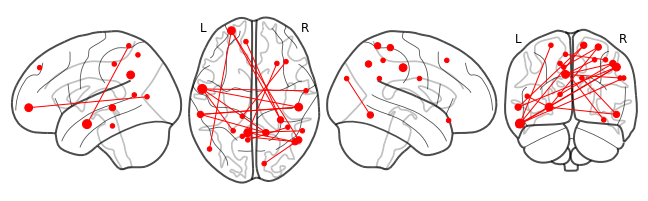

In [17]:
p_level = 0.005
thresh = 1 - p_level
mat2plot = 1-p_val
mat2plot = mat2plot[np.triu_indices_from(p_val, k=1)]

mat2plot[mat2plot<=thresh] = 0
edge_frac = mat2plot/mat2plot.shape[0]
edge_frac_square = scipy.spatial.distance.squareform(edge_frac)*5000

node_mask = np.amax(edge_frac_square, axis=0) >= thresh # find nodes that have at least one edge that passes the threshold
node_size = edge_frac_square.sum(axis=0)*node_mask*20 # size nodes based on how many suprathreshold edges they have
node_size = node_size

plot_connectome(adjacency_matrix=edge_frac_square, edge_threshold=thresh,
                node_color = 'red',
                node_coords=coordinates, node_size=node_size,
                display_mode= 'lzry',
                edge_kwargs={"linewidth": 1, 'color': 'red'})

## Regression

In [18]:

def mk_kfold_indices(subj_list, k = 10):
    """
    Splits list of subjects into k folds for cross-validation.
    """
    
    n_subs = len(subj_list)
    n_subs_per_fold = n_subs//k # floor integer for n_subs_per_fold

    indices = [[fold_no]*n_subs_per_fold for fold_no in range(k)] # generate repmat list of indices
    remainder = n_subs % k # figure out how many subs are left over
    remainder_inds = list(range(remainder))
    indices = [item for sublist in indices for item in sublist]    
    [indices.append(ind) for ind in remainder_inds] # add indices for remainder subs

    assert len(indices)==n_subs, "Length of indices list does not equal number of subjects, something went wrong"

    np.random.shuffle(indices) # shuffles in place

    return np.array(indices)


def split_train_test(subj_list, indices, test_fold):
    """
    For a subj list, k-fold indices, and given fold, returns lists of train_subs and test_subs
    """

    train_inds = np.where(indices!=test_fold)
    test_inds = np.where(indices==test_fold)

    train_subs = []
    for sub in subj_list[train_inds]:
        train_subs.append(sub)

    test_subs = []
    for sub in subj_list[test_inds]:
        test_subs.append(sub)

    return (train_subs, test_subs)


def get_train_test_data(all_fc_data, train_subs, test_subs, behav_data, behav):

    """
    Extracts requested FC and behavioral data for a list of train_subs and test_subs
    """

    train_vcts = all_fc_data.loc[train_subs, :]
    test_vcts = all_fc_data.loc[test_subs, :]

    train_behav = behav_data.loc[train_subs, behav]

    return (train_vcts, train_behav, test_vcts)


def select_features(train_vcts, train_behav, r_thresh=0.2, corr_type='pearson', verbose=False):
    
    """
    Runs the CPM feature selection step: 
    - correlates each edge with behavior, and returns a mask of edges that are correlated above some threshold, one for each tail (positive and negative)
    """

    assert train_vcts.index.equals(train_behav.index), "Row indices of FC vcts and behavior don't match!"

    # Correlate all edges with behav vector
    if corr_type =='pearson':
        cov = np.dot(train_behav.T - train_behav.mean(), train_vcts - train_vcts.mean(axis=0)) / (train_behav.shape[0]-1)
        corr = cov / np.sqrt(np.var(train_behav, ddof=1) * np.var(train_vcts, axis=0, ddof=1))
    elif corr_type =='spearman':
        corr = []
        for edge in train_vcts.columns:
            r_val = sp.stats.spearmanr(train_vcts.loc[:,edge], train_behav)[0]
            corr.append(r_val)

    # Define positive and negative masks
    mask_dict = {}
    mask_dict["pos"] = corr > r_thresh
    mask_dict["neg"] = corr < -r_thresh
    
    if verbose:
        print("Found ({}/{}) edges positively/negatively correlated with behavior in the training set".format(mask_dict["pos"].sum(), mask_dict["neg"].sum())) # for debugging

    return mask_dict



def build_model(train_vcts, mask_dict, train_behav):
    """
    Builds a CPM model:
    - takes a feature mask, sums all edges in the mask for each subject, and uses simple linear regression to relate summed network strength to behavior
    """

    assert train_vcts.index.equals(train_behav.index), "Row indices of FC vcts and behavior don't match!"

    model_dict = {}

    # Loop through pos and neg tails
    X_glm = np.zeros((train_vcts.shape[0], len(mask_dict.items())))

    t = 0
    for tail, mask in mask_dict.items():
        X = train_vcts.values[:, mask].sum(axis=1)
        X_glm[:, t] = X
        y = train_behav
        (slope, intercept) = np.polyfit(X, y, 1)
        model_dict[tail] = (slope, intercept)
        t+=1

    X_glm = np.c_[X_glm, np.ones(X_glm.shape[0])]
    model_dict["glm"] = tuple(np.linalg.lstsq(X_glm, y, rcond=None)[0])

    return model_dict


def apply_model(test_vcts, mask_dict, model_dict):
    """
    Applies a previously trained linear regression model to a test set to generate predictions of behavior.
    """

    behav_pred = {}

    X_glm = np.zeros((test_vcts.shape[0], len(mask_dict.items())))

    # Loop through pos and neg tails
    t = 0
    for tail, mask in mask_dict.items():
        X = test_vcts.loc[:, mask].sum(axis=1)
        X_glm[:, t] = X

        slope, intercept = model_dict[tail]
        behav_pred[tail] = slope*X + intercept
        t+=1

    X_glm = np.c_[X_glm, np.ones(X_glm.shape[0])]
    behav_pred["glm"] = np.dot(X_glm, model_dict["glm"])

    return behav_pred


def cpm_wrapper(all_fc_data, all_behav_data, behav, k=10, **cpm_kwargs):

    #assert all_fc_data.index.equals(all_behav_data.index), "Row (subject) indices of FC vcts and behavior don't match!"

    subj_list = all_fc_data.index # get subj_list from df index
    
    indices = mk_kfold_indices(subj_list, k=k)
    
    # Initialize df for storing observed and predicted behavior
    col_list = []
    for tail in ["pos", "neg", "glm"]:
        col_list.append(behav + " predicted (" + tail + ")")
    col_list.append(behav + " observed")
    behav_obs_pred = pd.DataFrame(index=subj_list, columns = col_list)
    
    # Initialize array for storing feature masks
    n_edges = all_fc_data.shape[1]
    all_masks = {}
    all_masks["pos"] = np.zeros((k, n_edges))
    all_masks["neg"] = np.zeros((k, n_edges))
    
    for fold in range(k):
        print("doing fold {}".format(fold))
        train_subs, test_subs = split_train_test(subj_list, indices, test_fold=fold)
        train_vcts, train_behav, test_vcts = get_train_test_data(all_fc_data, train_subs, test_subs, all_behav_data, behav=behav)
        mask_dict = select_features(train_vcts, train_behav, **cpm_kwargs)
        all_masks["pos"][fold,:] = mask_dict["pos"]
        all_masks["neg"][fold,:] = mask_dict["neg"]
        model_dict = build_model(train_vcts, mask_dict, train_behav)
        behav_pred = apply_model(test_vcts, mask_dict, model_dict)
        for tail, predictions in behav_pred.items():
            behav_obs_pred.loc[test_subs, behav + " predicted (" + tail + ")"] = predictions
            
    behav_obs_pred.loc[subj_list, behav + " observed"] = all_behav_data[behav]
    
    return behav_obs_pred, all_masks


def plot_consistent_edges(all_masks, tail, thresh = 1., color='gray'):
    
    edge_frac = (all_masks[tail].sum(axis=0))/(all_masks[tail].shape[0])
    print("For the {} tail, {} edges were selected in at least {}% of folds".format(tail, (edge_frac>=thresh).sum(), thresh*100))
    edge_frac_square = scipy.spatial.distance.squareform(edge_frac)

    node_mask = np.amax(edge_frac_square, axis=0) >= thresh # find nodes that have at least one edge that passes the threshold
    node_size = edge_frac_square.sum(axis=0)*node_mask*20 # size nodes based on how many suprathreshold edges they have

    plot_connectome(adjacency_matrix=edge_frac_square, edge_threshold=thresh,
                    node_color = color,
                    node_coords=coordinates, node_size=node_size,
                    display_mode= 'lzry',
                    edge_kwargs={"linewidth": 1, 'color': color})
    
#@title Defining Function for Regression

In [19]:
# @title #Variable that we want to regress

# Select Subject
var2regress = "continous"  # @param ['dichotomy', 'continous']


if var2regress == 'continous':
  fc = np.concatenate((sleepy, not_sleepy))

  all_fc_data = np.zeros(((len(subj2use)), int(( len(atlas['ROI Name']) * (len(atlas['ROI Name']) - 1) ) / 2) )) #'n_nodes*(n_nodes-1)/2 


  prova = sym_matrix_to_vec(fc[0], discard_diagonal=True)
  for subject in range(fc.shape[0]):
      all_fc_data[subject,:] = fc[subject][np.triu_indices_from(fc[subject], k=1)]

  all_fc_data = pd.DataFrame(data=all_fc_data, index=subj2use)


elif var2regress == 'dichotomy':

  miss_value_idx = np.where(subj_info_filtered['SleepDeprivedSession1'].astype(str) == 'nan')[0]
  subj_info_filtered_removed = subj_info_filtered.drop(['sub-9100'], axis=0)


  for xx in miss_value_idx:
    subj_info_filtered_removed = subj_info_filtered_removed.drop([subj2use[xx]], axis=0)


  fc= np.zeros((len(subj2use), 100, 100))
  for xx in range(len(subj2use)):
    sub = subj2use[xx]
    subj_idx = [i for i, s in enumerate(all_ptsrs_fs) if sub in s][0]
    ts2use = nib.load(all_ptsrs_fs[subj_idx]).get_data()
    fc[xx,:,:] = np.array(pd.DataFrame(ts2use).corr())

  all_fc_data = np.zeros(((len(subj2use)), int(( len(atlas['ROI Name']) * (len(atlas['ROI Name']) - 1) ) / 2) )) #'n_nodes*(n_nodes-1)/2 


  prova = sym_matrix_to_vec(fc[0], discard_diagonal=True)
  for subject in range(fc.shape[0]):
      all_fc_data[subject,:] = fc[subject][np.triu_indices_from(fc[subject], k=1)]

  all_fc_data = pd.DataFrame(data=all_fc_data, index=subj2use)

  for xx in miss_value_idx:
    all_fc_data = all_fc_data.drop([subj2use[xx]], axis=0)



all_fc_data.head() 

,0,1,2,3,4,5,6,7,8,9,...,4940,4941,4942,4943,4944,4945,4946,4947,4948,4949
sub-9002,-0.268541,0.066754,-0.002081,-0.473618,0.029631,-0.073880,-0.197855,0.006655,0.354120,0.297336,...,0.700363,0.370715,0.671309,0.684687,0.500080,0.403040,0.668268,0.393627,0.724631,0.680627
sub-9003,-0.138797,0.237953,-0.277408,0.236070,0.257885,0.003697,-0.195221,-0.045329,0.030099,0.166123,...,0.493041,0.216672,0.539110,0.770461,-0.111735,0.148762,0.517436,0.456919,0.311614,0.659632
sub-9004,-0.320190,-0.031859,-0.205055,0.055709,0.548586,0.303540,-0.126600,0.315456,0.053672,0.076178,...,0.417258,-0.138106,0.412602,0.703702,0.241610,0.040340,0.478144,-0.022711,-0.120179,0.523175
sub-9005,0.059558,0.164714,0.025256,0.023720,0.382828,0.005051,0.049467,0.083227,0.210047,0.024197,...,0.713522,0.656724,0.523521,0.587850,0.522298,0.241902,0.573380,0.636687,0.739202,0.695635
sub-9008,-0.113829,0.225913,-0.199575,0.087474,0.306047,-0.290984,-0.224479,0.300339,-0.149283,-0.069398,...,0.516570,0.561066,0.523614,0.574633,0.508145,0.187284,0.492293,0.482336,0.560916,0.658201


In [20]:
if var2regress == 'continous':
  cpm_kwargs = {'r_thresh': 0.35, 'corr_type': 'pearson'} # these are the defaults, but it's still good to be explicit

  ses = 'ses-1'
  all_behav_data = KSS_df
  all_behav_data.index = subj2use

elif var2regress == 'dichotomy':

  all_behav_data = {'SleepDeprivedSession1':subj_info_filtered_removed['SleepDeprivedSession1']}

  all_behav_data = pd.DataFrame(all_behav_data)
  all_behav_data = all_behav_data.replace('Surely', int(5))
  all_behav_data = all_behav_data.replace('Likely', int(4))
  all_behav_data = all_behav_data.replace('Equivocal', int(3))
  all_behav_data = all_behav_data.replace('SurelyNot', int(1))
  all_behav_data = all_behav_data.replace('LikelyNot', int(2))

  cpm_kwargs = {'r_thresh': 0.4, 'corr_type': 'pearson'} # these are the defaults, but it's still good to be explicit


  ses = 'SleepDeprivedSession1'
  all_behav_data.index = subj_info_filtered_removed.index


behav_obs_pred, all_masks = cpm_wrapper(all_fc_data, all_behav_data, behav=ses, **cpm_kwargs)



doing fold 0
doing fold 1
doing fold 2
doing fold 3
doing fold 4
doing fold 5
doing fold 6
doing fold 7
doing fold 8
doing fold 9


In [21]:
behav_obs_pred.head()


,ses-1 predicted (pos),ses-1 predicted (neg),ses-1 predicted (glm),ses-1 observed
sub-9002,5.267318,5.408073,5.432922,3.0
sub-9003,4.649221,5.677953,5.293982,4.0
sub-9004,3.865195,4.263136,3.894222,5.833333
sub-9005,5.514262,4.997549,5.247666,5.166667
sub-9008,4.815304,4.777224,4.76608,4.666667


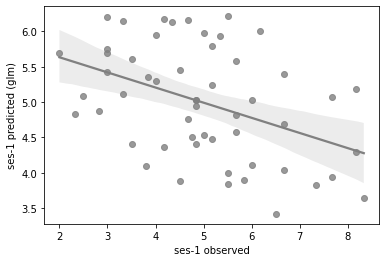

In [22]:
x = behav_obs_pred.filter(regex=("obs")).astype(float)
y = behav_obs_pred.filter(regex=('glm')).astype(float)

g = sns.regplot(x=x.T.squeeze(), y=y.T.squeeze(), color='gray')

For the pos tail, 4 edges were selected in at least 80.0% of folds


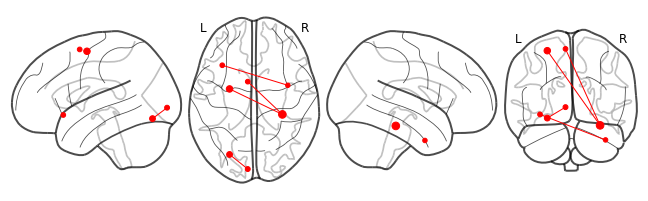

In [23]:
plot_consistent_edges(all_masks, "pos", thresh = 0.8, color = 'red')


#Suhayb's EDA

In [24]:
project_3_df = subj_info_filtered.copy()

In [25]:
project_3_df['BMI1'] = [float(x.replace(",", ".")) for x in subj_info_filtered['BMI1']]
project_3_df['KSQ_SleepQualityIndex'] = [float(x.replace(",", ".")) for x in subj_info_filtered['KSQ_SleepQualityIndex']]
project_3_df['KSQ_WakeupSymptomIndex'] = [float(x.replace(",", ".")) for x in subj_info_filtered['KSQ_WakeupSymptomIndex']]
project_3_df['KSQ_SnoringSymptomIndex'] = [float(x.replace(",", ".")) for x in subj_info_filtered['KSQ_SnoringSymptomIndex']]
project_3_df['KSQ_SleepSymptomIndex'] = [float(x.replace(",", ".")) for x in subj_info_filtered['KSQ_SleepSymptomIndex']]
project_3_df['IRI_EC'] = [float(x.replace(",", ".")) for x in subj_info_filtered['IRI_EC']]
project_3_df['IRI_PT'] = [float(x.replace(",", ".")) for x in subj_info_filtered['IRI_PT']]
project_3_df['IRI_PD'] = [float(x.replace(",", ".")) for x in subj_info_filtered['IRI_PD']]
project_3_df['IRI_F'] = [float(x.replace(",", ".")) for x in subj_info_filtered['IRI_F']]
project_3_df['ECS'] = [float(x.replace(",", ".")) for x in subj_info_filtered['ECS']]
project_3_df['BMI2'] = [float(x.replace(",", ".")) for x in subj_info_filtered['BMI2'].astype(str)]
project_3_df['BIS11_Total'] = [float(x.replace(",", ".")) for x in subj_info_filtered['BIS11_Total'].astype(str)]
project_3_df['BIS11_Motor'] = [float(x.replace(",", ".")) for x in subj_info_filtered['BIS11_Motor'].astype(str)]
project_3_df['BIS11_Nonplanning'] = [float(x.replace(",", ".")) for x in subj_info_filtered['BIS11_Nonplanning'].astype(str)]

project_3_df = project_3_df.drop(['EducationLevel'], axis = 1)
project_3_df = project_3_df.drop(['GeneralImpression1'], axis = 1)
project_3_df = project_3_df.drop(['GeneralImpression2'], axis = 1)
project_3_df = project_3_df.drop(['StrategyARROWS'], axis = 1)
project_3_df = project_3_df.drop(['Contraceptives'], axis = 1)
project_3_df = project_3_df.drop(['OtherDrugs'], axis = 1)
project_3_df = project_3_df.drop(['KSQ_ConcernDisturbedSleep'], axis = 1)
project_3_df = project_3_df.drop(['KSQ_Panic'], axis = 1)
project_3_df = project_3_df.drop(['KSQ_NapFrequency'], axis = 1)
project_3_df = project_3_df.drop(['KSQ_Worry'], axis = 1)
project_3_df = project_3_df.drop(['KSQ_CompensatoryMorningSleep'], axis = 1)
project_3_df = project_3_df.drop(['KSQ_ConcernFatigue'], axis = 1)
project_3_df = project_3_df.drop(['KSQ_EnoughSleep'], axis = 1)
project_3_df = project_3_df.drop(['KSQ_HealthProblem'], axis = 1)
project_3_df = project_3_df.drop(['KSQ_OverallSleepQuality'], axis = 1)
project_3_df = project_3_df.drop(['TestTimeType_1'], axis = 1)
project_3_df = project_3_df.drop(['TestTimeType_2'], axis = 1)


In [40]:
project_3_df

,Sex,AgeGroup,BMI1,BMI2,HADS_Anxiety,HADS_Depression,ISI,KSQ_SleepQualityIndex,KSQ_WakeupSymptomIndex,KSQ_SnoringSymptomIndex,...,PPIR_IR15,PPIR_IR40,BADD_Total,BADD_Activation,BADD_Attention,BADD_Effort,BADD_Affect,BADD_Memory,Sl_cond,Trial
participant_id,,,,,,,,,,,,,,,,,,,,,
sub-9002,Male,Old,21.799445,21.469150,2,3,9,5.50,5.666667,6.000000,...,10.0,32.0,33.0,5.0,8.0,6.0,8.0,6.0,2,B
sub-9003,Male,Old,20.498615,20.498615,2,3,10,5.25,5.666667,5.666667,...,12.0,26.0,13.0,4.0,4.0,4.0,1.0,0.0,1,B
sub-9004,Female,Old,22.948116,22.948116,1,2,11,4.25,5.666667,5.333333,...,10.0,28.0,24.0,3.0,7.0,5.0,6.0,3.0,1,B
sub-9005,Male,Old,24.755464,24.755464,0,0,9,6.00,5.666667,6.000000,...,8.0,28.0,30.0,9.0,5.0,7.0,3.0,6.0,2,B
sub-9008,Male,Old,22.340297,22.642193,1,1,9,5.00,4.000000,4.666667,...,13.0,28.0,17.0,4.0,5.0,3.0,1.0,4.0,2,A
sub-9009,Female,Old,28.042817,27.700831,0,0,9,5.00,5.666667,5.333333,...,9.0,36.0,3.0,0.0,0.0,1.0,1.0,1.0,1,A
sub-9011,Female,Old,21.230572,20.829995,2,3,11,4.50,5.666667,6.000000,...,11.0,31.0,27.0,8.0,6.0,3.0,10.0,0.0,1,A
sub-9014,Male,Old,27.748873,27.748873,1,1,8,5.75,5.666667,5.666667,...,8.0,35.0,23.0,5.0,6.0,8.0,3.0,1.0,1,A
sub-9018,Female,Young,26.722873,26.346494,4,1,11,5.75,5.333333,6.000000,...,6.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,2,B


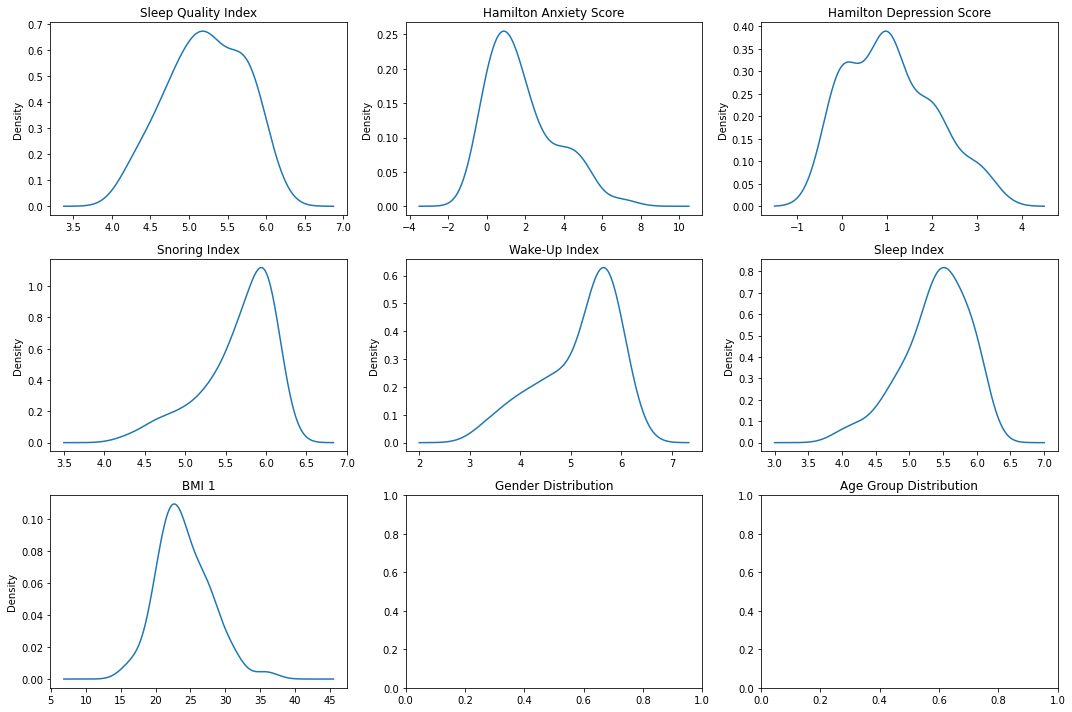

In [26]:
df = subj_info_filtered.copy()

fig, ax = plt.subplots(ncols=3,nrows=3, figsize=(15,10))

a = ax[0][0]
project_3_df['KSQ_SleepQualityIndex'].plot(kind='kde', ax = a)
a.set_title('Sleep Quality Index')

b = ax[0][1]
project_3_df['HADS_Anxiety'].plot(kind='kde', ax = b)
b.set_title('Hamilton Anxiety Score')

c = ax[0][2]
project_3_df['HADS_Depression'].plot(kind='kde', ax = c)
c.set_title('Hamilton Depression Score')

d = ax[1][0]
project_3_df['KSQ_SnoringSymptomIndex'].plot(kind='kde', ax = d)
d.set_title('Snoring Index')

e = ax[1][1]
project_3_df['KSQ_WakeupSymptomIndex'].plot(kind='kde', ax = e)
e.set_title('Wake-Up Index')

f = ax[1][2]
project_3_df['KSQ_SleepSymptomIndex'].plot(kind='kde', ax = f)
f.set_title('Sleep Index')

g = ax[2][0]
project_3_df['BMI1'].plot(kind='kde', ax = g)
g.set_title('BMI 1')

h = ax[2][1]
#project_3_df['Sex'].plot(kind='hist', ax = h)
h.set_title('Gender Distribution')

i = ax[2][2]
#project_3_df['AgeGroup'].plot(kind='hist', ax = i)
i.set_title('Age Group Distribution')

plt.tight_layout()

<function matplotlib.pyplot.show>

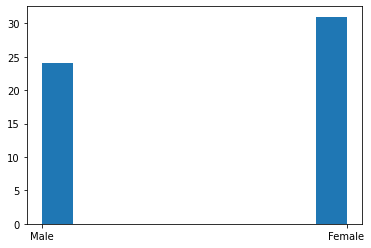

In [27]:
plt.hist(subj_info_filtered['Sex'])
plt.show

<function matplotlib.pyplot.show>

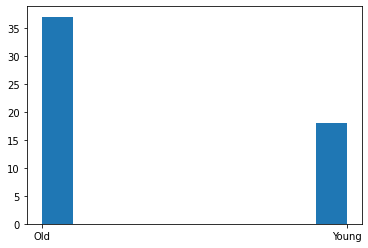

In [28]:
plt.hist(subj_info_filtered['AgeGroup'])
plt.show

In [53]:
project_3_df

,Sex,AgeGroup,BMI1,BMI2,HADS_Anxiety,HADS_Depression,ISI,KSQ_SleepQualityIndex,KSQ_WakeupSymptomIndex,KSQ_SnoringSymptomIndex,...,PPIR_IR15,PPIR_IR40,BADD_Total,BADD_Activation,BADD_Attention,BADD_Effort,BADD_Affect,BADD_Memory,Sl_cond,Trial
participant_id,,,,,,,,,,,,,,,,,,,,,
sub-9002,Male,Old,21.799445,21.469150,2,3,9,5.50,5.666667,6.000000,...,10.0,32.0,33.0,5.0,8.0,6.0,8.0,6.0,2,B
sub-9003,Male,Old,20.498615,20.498615,2,3,10,5.25,5.666667,5.666667,...,12.0,26.0,13.0,4.0,4.0,4.0,1.0,0.0,1,B
sub-9004,Female,Old,22.948116,22.948116,1,2,11,4.25,5.666667,5.333333,...,10.0,28.0,24.0,3.0,7.0,5.0,6.0,3.0,1,B
sub-9005,Male,Old,24.755464,24.755464,0,0,9,6.00,5.666667,6.000000,...,8.0,28.0,30.0,9.0,5.0,7.0,3.0,6.0,2,B
sub-9008,Male,Old,22.340297,22.642193,1,1,9,5.00,4.000000,4.666667,...,13.0,28.0,17.0,4.0,5.0,3.0,1.0,4.0,2,A
sub-9009,Female,Old,28.042817,27.700831,0,0,9,5.00,5.666667,5.333333,...,9.0,36.0,3.0,0.0,0.0,1.0,1.0,1.0,1,A
sub-9011,Female,Old,21.230572,20.829995,2,3,11,4.50,5.666667,6.000000,...,11.0,31.0,27.0,8.0,6.0,3.0,10.0,0.0,1,A
sub-9014,Male,Old,27.748873,27.748873,1,1,8,5.75,5.666667,5.666667,...,8.0,35.0,23.0,5.0,6.0,8.0,3.0,1.0,1,A
sub-9018,Female,Young,26.722873,26.346494,4,1,11,5.75,5.333333,6.000000,...,6.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,2,B


In [54]:
project_3_df_updated = project_3_df.join(KSS_df)
project_3_df_updated = project_3_df_updated.drop('sub-9100')
project_3_df_updated.rename(columns={'ses-1':'sleepy_ses_1', 'ses-2':'sleepy_ses_2'}, inplace = True)

In [55]:
df3 = project_3_df_updated.copy()
df3["sleepy_dep"] = ""
df3["sleepy_nodep"] = ""

In [56]:
df3.loc[df3.Sl_cond == 1, 'sleepy_dep'] = df3['sleepy_ses_1'].copy()
df3.loc[df3.Sl_cond == 2, 'sleepy_nodep'] = df3['sleepy_ses_1'].copy()
df3.loc[df3.Sl_cond == 2, 'sleepy_dep'] = df3['sleepy_ses_2'].copy()
df3.loc[df3.Sl_cond == 1, 'sleepy_nodep'] = df3['sleepy_ses_2'].copy()


In [57]:
from scipy import stats

In [58]:
#paired sample t test between conditions
stats.ttest_rel(df3['sleepy_dep'], df3['sleepy_nodep'])

Ttest_relResult(statistic=9.060908864390798, pvalue=2.354432596567333e-12)

In [59]:
#inde sample t test between age groups
young_sleepy = df3[df3['AgeGroup']=='Young']['sleepy_dep']
old_sleepy = df3[df3['AgeGroup']=='Old']['sleepy_dep']

#test assumption
stats.bartlett(young_sleepy, old_sleepy)

BartlettResult(statistic=0.0014828531249729926, pvalue=0.9692827870877525)

In [60]:
stats.ttest_ind(young_sleepy, old_sleepy, equal_var=True)

Ttest_indResult(statistic=3.843450312696103, pvalue=0.00033204833372784277)

In [61]:
#inde sample t test between gender
female_sleepy = df3[df3['Sex']=='Female']['sleepy_dep']
male_sleepy = df3[df3['Sex']=='Male']['sleepy_dep']

#test assumption
stats.bartlett(female_sleepy, male_sleepy)

BartlettResult(statistic=0.018003213577317292, pvalue=0.8932633604866065)

In [62]:
stats.ttest_ind(female_sleepy, male_sleepy, equal_var=True)

Ttest_indResult(statistic=0.34143216872373633, pvalue=0.734154159196901)

In [63]:
#df3.to_csv('cleaned_csv_updated.csv')
#files.download('cleaned_csv_updated.csv')

In [298]:
df3["sleepy_dep"] = ""
df3["sleepy_nodep"] = ""
df3.loc[df3.Sl_cond == 1, 'sleepy_dep'] = df3['sleepy_ses_1'].copy()
df3.loc[df3.Sl_cond == 2, 'sleepy_nodep'] = df3['sleepy_ses_1'].copy()
df3.loc[df3.Sl_cond == 2, 'sleepy_dep'] = df3['sleepy_ses_2'].copy()
df3.loc[df3.Sl_cond == 1, 'sleepy_nodep'] = df3['sleepy_ses_2'].copy()
df3

KeyError: ignored

In [293]:
project_3_df['BMI2'][project_3_df['BMI2'].isnull()==False]

participant_id
sub-9002    21.469150
sub-9003    20.498615
sub-9004    22.948116
sub-9005    24.755464
sub-9008    22.642193
sub-9009    27.700831
sub-9011    20.829995
sub-9014    27.748873
sub-9018    26.346494
sub-9020    21.224490
sub-9023    24.535124
sub-9025    21.224490
sub-9026    30.021502
sub-9028    24.280264
sub-9029    22.052190
sub-9032    35.817711
sub-9033    25.945484
sub-9034    22.783309
sub-9036    26.038781
sub-9038    24.677021
sub-9039    23.054562
sub-9040    23.795360
sub-9041    20.322253
sub-9042    21.718066
sub-9045    22.058051
sub-9046    22.839506
sub-9047    28.959000
sub-9048    23.991213
sub-9049    21.564545
sub-9055    19.135802
sub-9058    23.661439
sub-9061    31.955923
sub-9062    19.486961
sub-9064    21.484375
sub-9065    28.027682
sub-9068    28.060019
sub-9069    20.322253
sub-9071    26.729927
sub-9072    24.816327
sub-9075    26.287807
sub-9079    26.122449
sub-9080    25.401701
sub-9081    25.925926
sub-9084    20.703125
sub-9085    16.29

In [63]:
from nilearn.glm.second_level import SecondLevelModel


In [ ]:
second_level_model = SecondLevelModel().fit(cmap_filenames, design_matrix= design_matrix)